# Step 1 : Import Required Libraries

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline

# Step 2 : Load the dataset.

In [40]:
df = pd.read_csv("Churn_Modelling.csv")

In [41]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Step 3: Visualizations

## 3.1 Univariate Analysis

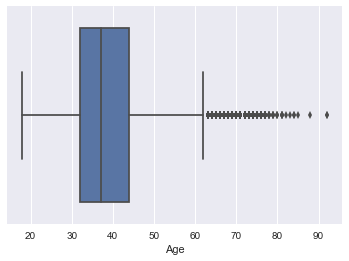

In [43]:
sns.boxplot(df['Age'])

## 3.2 Bi-Variate Analysis

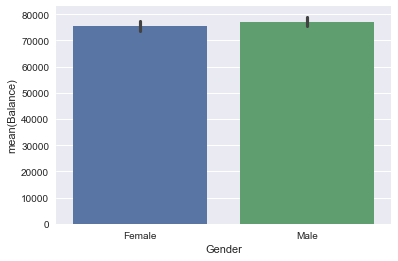

In [44]:
sns.barplot(df['Gender'], df['Balance'])

## 3.3 Multi-Variate Analysis

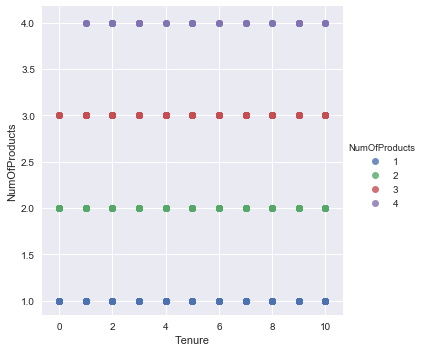

In [54]:
sns.lmplot("Tenure","NumOfProducts",df,hue="NumOfProducts", fit_reg=False);

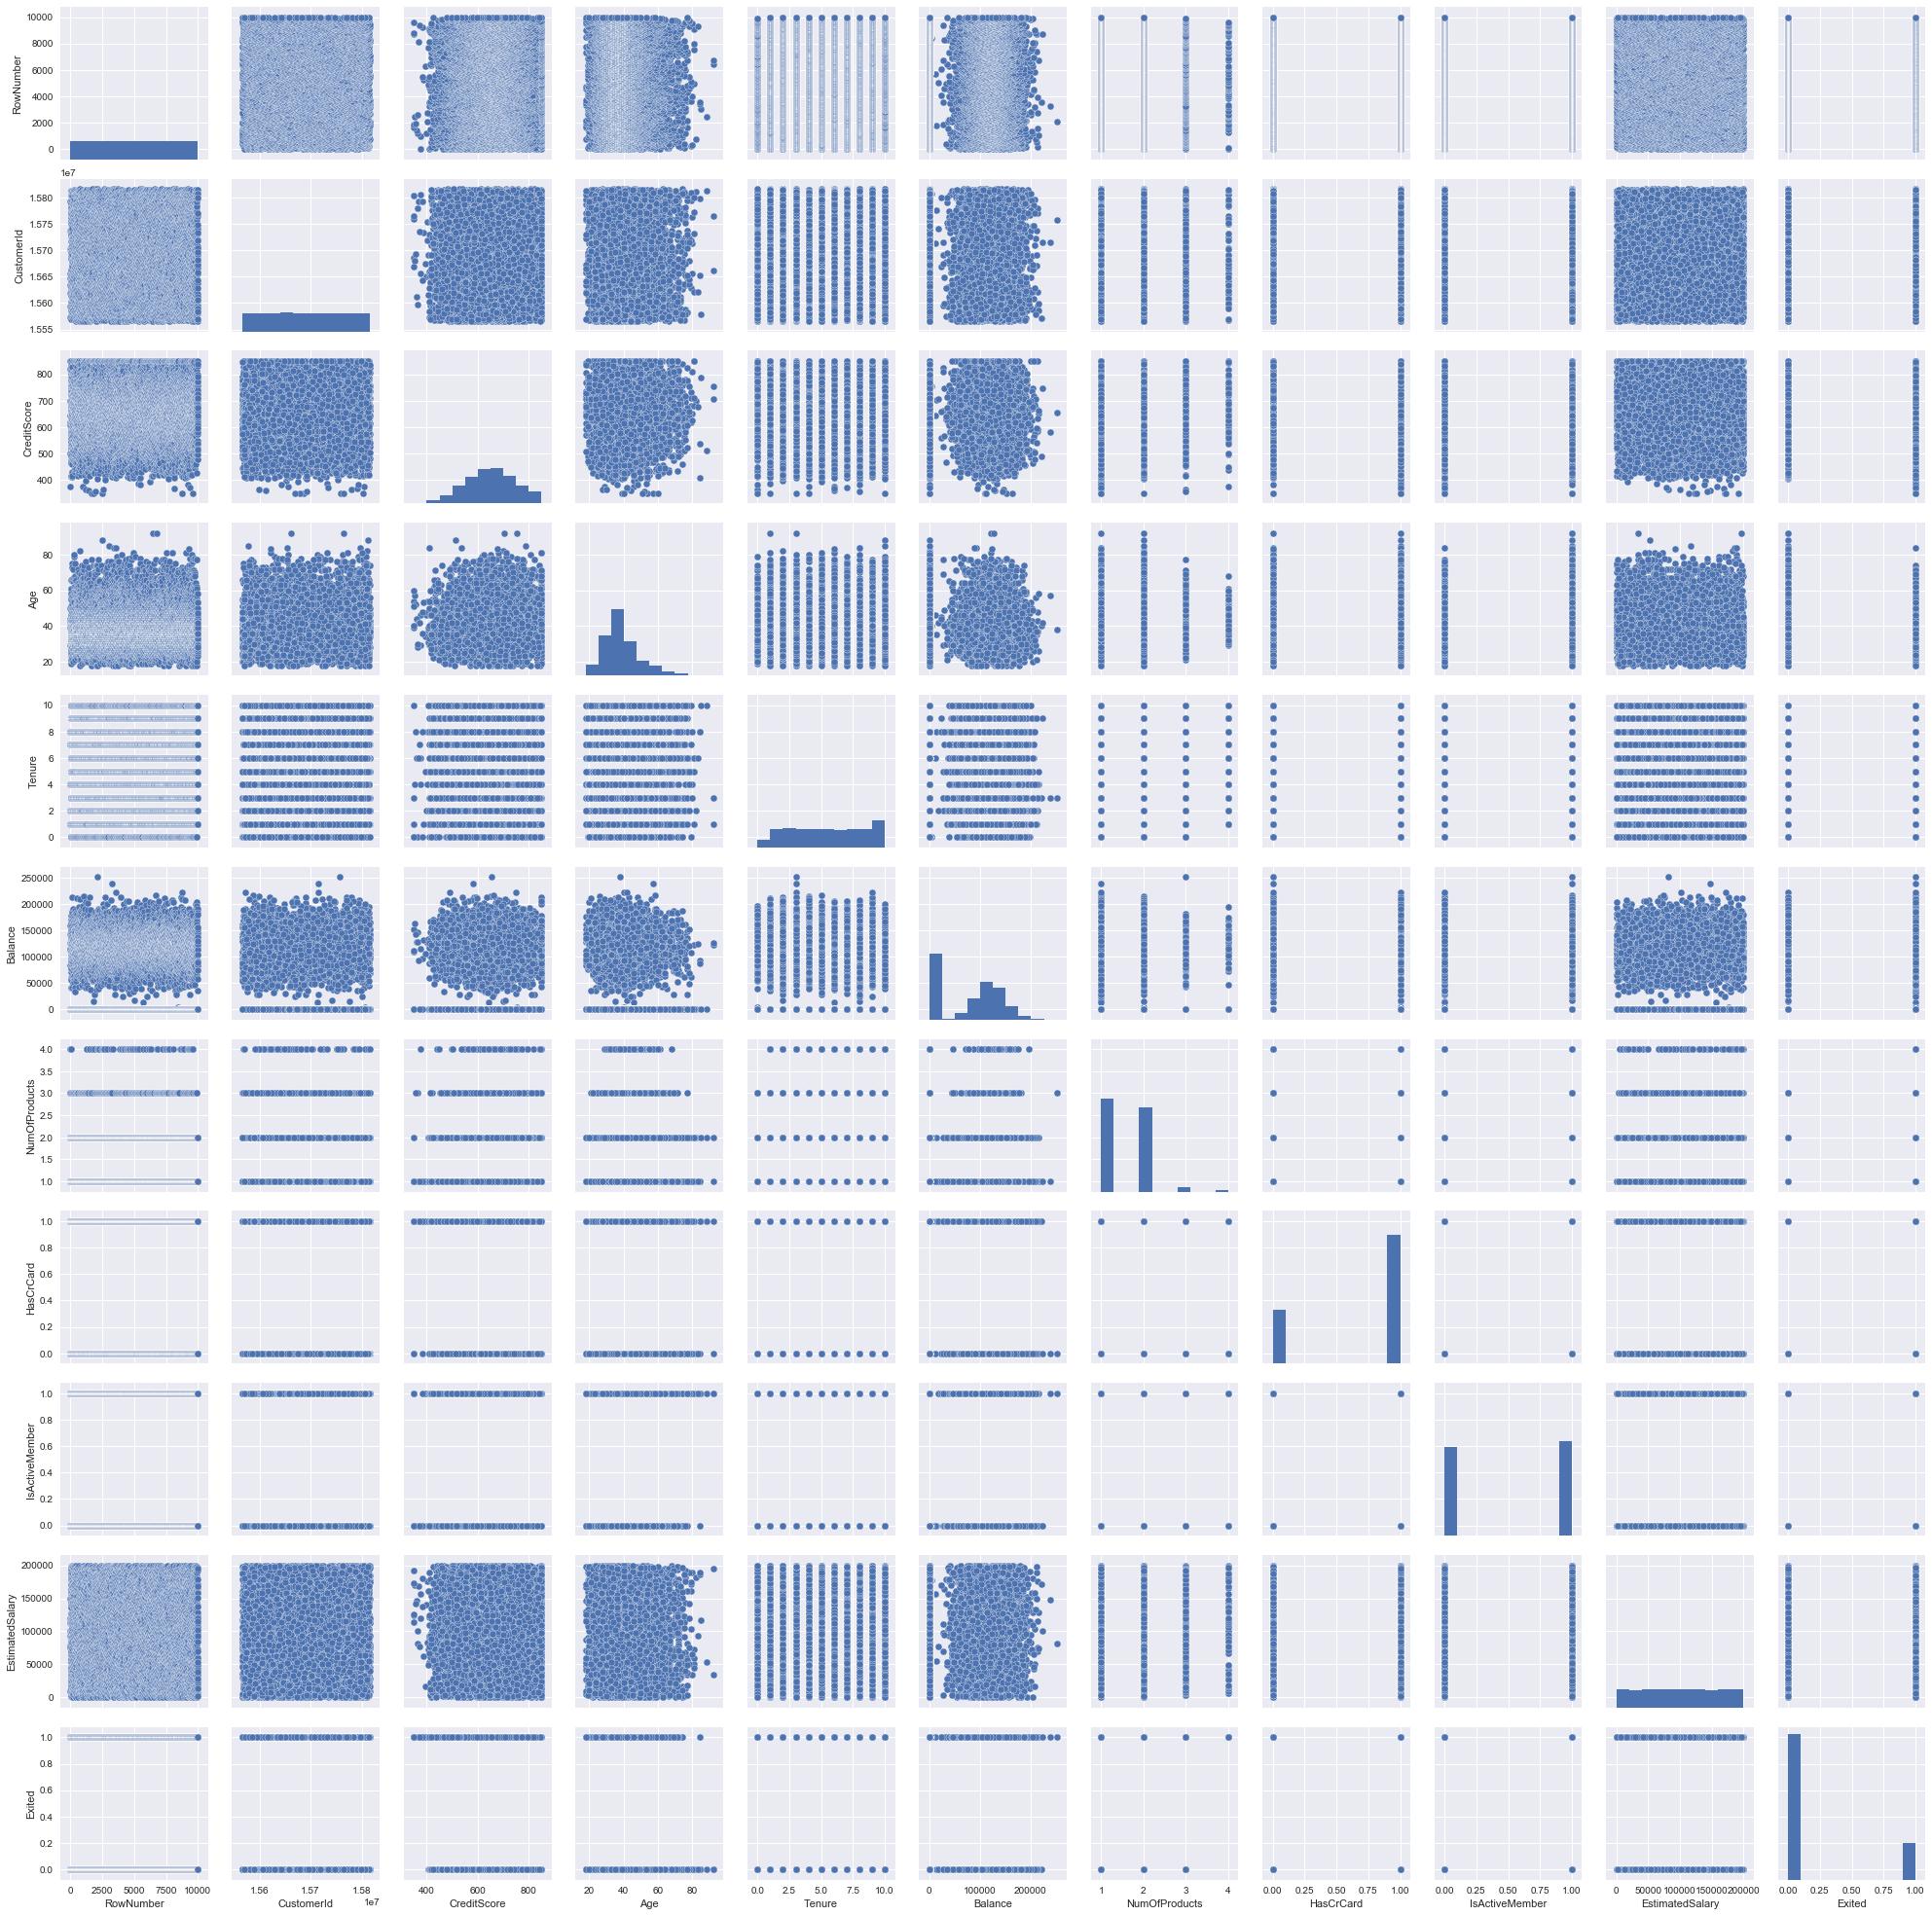

In [46]:
sns.pairplot(df)

# Step 4 : Perform descriptive statistics on the dataset.

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [48]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Step 5 : Handle the Missing values.

In [49]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### There is no missing value in the dataset. 

# Step 6 : Find the outliers and replace the outliers.

# Step 7 : Check for categorical columns and perform encoding.

In [56]:
pd.get_dummies(df, columns=["Gender", "Age"], prefix=["Age", "Gender"]).head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,Gender_78,Gender_79,Gender_80,Gender_81,Gender_82,Gender_83,Gender_84,Gender_85,Gender_88,Gender_92
0,1,15634602,Hargrave,619,France,2,0.00,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,15647311,Hill,608,Spain,1,83807.86,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,15619304,Onio,502,France,8,159660.80,3,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,15701354,Boni,699,France,1,0.00,2,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,15737888,Mitchell,850,Spain,2,125510.82,1,1,1,...,0,0,0,0,0,0,0,0,0,0


# Step 8 : Split the Data Into Dependent and Independent Variables.

In [58]:
x=df.iloc[:,:-1]
x.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [59]:
y=df.iloc[:,-1]
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

# Step 9 : Scale the independent variables.

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[["CustomerId"]] = scaler.fit_transform(df[["CustomerId"]])
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,0.275616,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,0.326454,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,0.214421,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,0.542636,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,0.688778,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Step 10 : Split the data into training and testing.

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33)

In [63]:
x_train.shape

(6700, 13)

In [64]:
x_test.shape

(3300, 13)

In [65]:
y_train.shape

(6700,)

In [66]:
y_test.shape

(3300,)